<a href="https://colab.research.google.com/github/WhalepigJun/Competition_CAUST/blob/main/%EC%83%81%EA%B6%8C%EB%B3%84_data_1108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 추정 매출 data
sales2013 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2013.csv", encoding="CP949")
sales2014 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2014.csv", encoding="CP949")
sales2015 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2015.csv", encoding="CP949")
sales2016 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2016.csv", encoding="CP949")
sales2017 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2017.csv", encoding="CP949")
sales2018 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018.csv", encoding="CP949")
sales2019 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv", encoding="CP949")
sales2020 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정매출/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2020.csv", encoding="CP949")

In [3]:
# 2013년부터 2020년 데이터 칼럼명을 동일하게 세팅 (2017년을 기준으로 맞춤)
for i in range(2013,2021):
  locals()["sales" + str(i)].columns = sales2017.columns

In [4]:
sales = pd.concat([sales2013,sales2014,sales2015,sales2016,sales2017,sales2018,sales2019,sales2020])
sales["induty_cd"] = sales["svc_induty_cd"].str[:3]

In [5]:
# 방송 점포 포함 또는 주변 전통시장, 골목상권
# haebangchon = ["신흥시장","신흥로20길","소월로20길"]
# seongsu = ["뚝섬로5길","상원길","성수일로6길","아차산로5길","왕십리로6길"]
# seongnae = ["천호대로162길","천호옛길","천호옛14길","풍성로37가길","천호대로170길"]
# hongeun = ["포방터시장"]
# chungpa = ["청파로47길","청파로47나길","원효로89길","한강대로 88길","두텁바위로1길"]
# hoegi = ["경희대로3길","경희대로4길","회귀시장"]
# dunchon = ["천호대로187길","명일로13길","양재대로96길"]
# jeongneung = ["정릉아리랑시장","정릉로26길","정릉로27길"]
# hongje = ["세무서길","세무서2길"]
# gongneung = ["공릉동도깨비시장", "동일로192길"]
# chang = ["노해로60길","도봉로109길","도봉로114길","쌍문역골목시장"]
# joonggokdong = ["긴고랑로9길","중곡제일시장","긴고랑로7길","긴고랑로8길","용마산로21길","긴고랑로20길"]

haebangchon = ["신흥시장"]
seongsu = ["상원길"]
seongnae = ["천호대로162길"]
hongeun = ["포방터시장"]
chungpa = ["청파로47길"]
hoegi = ["경희대로4길"]
dunchon = ["양재대로96길"]
jeongneung = ["정릉아리랑시장"]
hongje = ["세무서길"]
gongneung = ["공릉동도깨비시장"]
chang = ["도봉로114길"]
joonggokdong = ["긴고랑로9길"]

input = [haebangchon,seongsu,seongnae,hongeun,chungpa,hoegi,dunchon,jeongneung,hongje,gongneung,chang,joonggokdong]

#input = {"chungpa":chungpa, "joonggokdong":joonggokdong, "seongnae":seongnae, "chang":chang, 
#         "hoegi":hoegi, "seongsu":seongsu, "hongeun":hongeun, "dunchon":dunchon, "hongje":hongje, 
#         "jeongneung":jeongneung, "gongneung":gongneung, "haebangchon":haebangchon}

In [25]:
# 필요한 컬럼
col_ = ["stdr_yy_cd", "stdr_qu_cd", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt","ml_selng_co", "fml_selng_amt","fml_selng_co",
        "agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt",
        "agrde_10_selng_co",	"agrde_20_selng_co",	"agrde_30_selng_co",	"agrde_40_selng_co",	"agrde_50_selng_co",	"agrde_60_above_selng_co"]

# 필요 데이터 생성 함수
def sales_by_sanggwon(area):
  rdf = sales[sales["trdar_cd_nm"].isin(area) & sales["induty_cd"].isin(["CS1"])]
  rdf = rdf.groupby(["stdr_yy_cd","stdr_qu_cd"]).sum().reset_index()[col_]
  return rdf

In [26]:
s_data = sales_by_sanggwon(input[0])
s_data["area"] = 0
for i in range(1,len(input)):
  temp = sales_by_sanggwon(input[i])
  temp["area"] = i
  s_data = pd.concat([s_data,temp])

In [27]:
s_col = ["area"] + col_

In [28]:
# 매출 data
s_data[s_col]

,area,stdr_yy_cd,stdr_qu_cd,thsmon_selng_amt,thsmon_selng_co,ml_selng_amt,ml_selng_co,fml_selng_amt,fml_selng_co,agrde_10_selng_amt,agrde_20_selng_amt,agrde_30_selng_amt,agrde_40_selng_amt,agrde_50_selng_amt,agrde_60_above_selng_amt,agrde_10_selng_co,agrde_20_selng_co,agrde_30_selng_co,agrde_40_selng_co,agrde_50_selng_co,agrde_60_above_selng_co
0,0,2013,1,111812521,7422,63978487,3836,38053354,3149,464390,16189158,30129095,28775424,17474189,8999583,75,1474,2205,1803,952,475
1,0,2013,2,124981231,8047,67179528,3973,45094323,3699,550282,23658004,32199823,30544516,17799652,7521572,95,1838,2370,1889,1046,440
2,0,2013,3,122397896,8009,59927246,3817,49346722,3750,814196,21255595,30434572,28671488,16908770,11189353,89,1783,2282,1899,1045,469
3,0,2013,4,151256085,9064,83643623,4577,50565051,3911,1585294,24854227,31121630,48429391,18380999,9837134,162,2126,2381,1964,1377,475
4,0,2014,1,131798033,9505,67739030,4506,52351824,4367,1397414,25350490,31543269,33914320,17390561,10494807,167,2292,2593,2143,1154,529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,11,2019,2,1815007496,100831,1019821546,51875,699411490,45622,9149256,300699490,404549268,413559144,408394255,182881624,803,21235,25982,23637,17898,7943
26,11,2019,3,1785219168,101461,975446712,52373,707339084,45304,10220245,279760695,395751602,414769723,385174455,197109079,952,21869,25244,23377,17699,8545
27,11,2019,4,1521856253,78119,838741514,40810,591991597,34263,6278290,230505809,344059259,340020858,339623491,170245410,644,15405,19683,17510,14689,7143
28,11,2020,1,1286536500,66907,728347714,35513,487666859,28797,4173804,183477816,285930931,285305555,292941126,164185345,389,12618,16733,14400,13057,7121


In [29]:
# 추정 유동인구 data
f_pop = pd.read_csv("/content/drive/My Drive/Colab Notebooks/응통통계공모전/data/추정유동인구/서울시 우리마을가게 상권분석서비스(상권-추정유동인구)_2020.csv", encoding="CP949")

In [30]:
def f_pop_by_sanggwon(area):
  rdf = f_pop[f_pop["상권_코드_명"].isin(area)]
  rdf = rdf.groupby(["기준 년코드","기준_분기_코드"]).sum().reset_index()
  return rdf

In [31]:
f_pop_data = f_pop_by_sanggwon(input[0])
f_pop_data["area"] = 0
for i in range(1,len(input)):
  temp = f_pop_by_sanggwon(input[i])
  temp["area"] = i
  f_pop_data = pd.concat([f_pop_data,temp])

In [32]:
f_pop_col = ["area","기준 년코드","기준_분기_코드","총_유동인구_수","남성_유동인구_수","여성_유동인구_수","연령대_10_유동인구_수","연령대_20_유동인구_수","연령대_30_유동인구_수","연령대_40_유동인구_수","연령대_50_유동인구_수","연령대_60_이상_유동인구_수"]

In [33]:
# 유동인구 data
f_pop_data[f_pop_col]

,area,기준 년코드,기준_분기_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수
0,0,2014,1,31482,16811,14671,1498,4346,8268,7403,6145,3821
1,0,2014,2,35266,19068,16198,1671,4654,9034,8409,7199,4299
2,0,2014,3,37171,20080,17091,1639,4990,9584,8950,7506,4502
3,0,2014,4,28751,15581,13170,982,4568,7365,6803,5738,3295
4,0,2015,1,29675,16041,13633,968,4731,7400,7092,5879,3604
...,...,...,...,...,...,...,...,...,...,...,...,...
21,11,2019,2,663093,299778,363316,91515,84694,106751,99026,115899,165209
22,11,2019,3,639838,293627,346211,93140,82249,102909,92564,110974,158002
23,11,2019,4,691360,317834,373526,104097,88659,111392,98976,118132,170104
24,11,2020,1,686354,315446,370907,98552,93184,114799,99597,111982,168240


In [34]:
bd = [22,22,23,23,23,24,26,27,28,28,30,30]
name = ["haebangchon","seongsu","seongnae","hongeun","chungpa","hoegi","dunchon",
         "jeongneung","hongje","gongneung","chang","joonggokdong"]

In [113]:
from sklearn.linear_model import LinearRegression

lin_reg_sklearn = []
y_predict = []

lin_reg_sklearn_sex = []
y_predict_sex = []

lin_reg_sklearn_age = []
y_predict_age = []

for i in range(len(name)):
  lin_reg_sklearn.append(LinearRegression())
  lin_reg_sklearn[i].fit(np.arange(bd[i]).reshape(bd[i],1), s_data[s_data["area"]==i][0:bd[i]]["thsmon_selng_amt"])
  y_predict.append(lin_reg_sklearn[i].predict(np.arange(30).reshape(30,1)))
  
  lin_reg_sklearn_sex.append(LinearRegression())
  lin_reg_sklearn_sex.append(LinearRegression())
  lin_reg_sklearn_sex[2*i].fit(np.arange(bd[i]).reshape(bd[i],1), s_data[s_data["area"]==i][0:bd[i]]["ml_selng_amt"])
  y_predict_sex.append(lin_reg_sklearn_sex[2*i].predict(np.arange(30).reshape(30,1)))
  lin_reg_sklearn_sex[2*i+1].fit(np.arange(bd[i]).reshape(bd[i],1), s_data[s_data["area"]==i][0:bd[i]]["fml_selng_amt"])
  y_predict_sex.append(lin_reg_sklearn_sex[2*i+1].predict(np.arange(30).reshape(30,1)))


lin_reg_sklearn_co = []
y_predict_co = []

lin_reg_sklearn_co_sex = []
y_predict_co_sex = []

lin_reg_sklearn_co_age = []
y_predict_co_age = []

for i in range(len(name)):
  lin_reg_sklearn_co.append(LinearRegression())
  lin_reg_sklearn_co[i].fit(np.arange(bd[i]).reshape(bd[i],1), s_data[s_data["area"]==i][0:bd[i]]["thsmon_selng_co"])
  y_predict_co.append(lin_reg_sklearn_co[i].predict(np.arange(30).reshape(30,1)))

  lin_reg_sklearn_co_sex.append(LinearRegression())
  lin_reg_sklearn_co_sex.append(LinearRegression())
  lin_reg_sklearn_co_sex[2*i].fit(np.arange(bd[i]).reshape(bd[i],1), s_data[s_data["area"]==i][0:bd[i]]["ml_selng_co"])
  y_predict_co_sex.append(lin_reg_sklearn_co_sex[2*i].predict(np.arange(30).reshape(30,1)))
  lin_reg_sklearn_co_sex[2*i+1].fit(np.arange(bd[i]).reshape(bd[i],1), s_data[s_data["area"]==i][0:bd[i]]["fml_selng_co"])
  y_predict_co_sex.append(lin_reg_sklearn_co_sex[2*i+1].predict(np.arange(30).reshape(30,1)))


lin_reg_sklearn_f_pop = []
y_predict_f_pop = []

lin_reg_sklearn_f_pop_sex = []
y_predict_f_pop_sex = []

lin_reg_sklearn_f_pop_age = []
y_predict_co_age = []

for i in range(len(name)):
  lin_reg_sklearn_f_pop.append(LinearRegression())
  lin_reg_sklearn_f_pop[i].fit(np.arange(bd[i]-4).reshape(bd[i]-4,1), f_pop_data[f_pop_data["area"]==i][0:bd[i]-4]["총_유동인구_수"])
  y_predict_f_pop.append(lin_reg_sklearn_f_pop[i].predict(np.arange(26).reshape(26,1)))
  
  lin_reg_sklearn_f_pop_sex.append(LinearRegression())
  lin_reg_sklearn_f_pop_sex.append(LinearRegression())
  lin_reg_sklearn_f_pop_sex[2*i].fit(np.arange(bd[i]-4).reshape(bd[i]-4,1), f_pop_data[f_pop_data["area"]==i][0:bd[i]-4]["남성_유동인구_수"])
  y_predict_f_pop_sex.append(lin_reg_sklearn_f_pop_sex[2*i].predict(np.arange(26).reshape(26,1)))
  lin_reg_sklearn_f_pop_sex[2*i+1].fit(np.arange(bd[i]-4).reshape(bd[i]-4,1), f_pop_data[f_pop_data["area"]==i][0:bd[i]-4]["여성_유동인구_수"])
  y_predict_f_pop_sex.append(lin_reg_sklearn_f_pop_sex[2*i+1].predict(np.arange(26).reshape(26,1)))




# 매출 금액

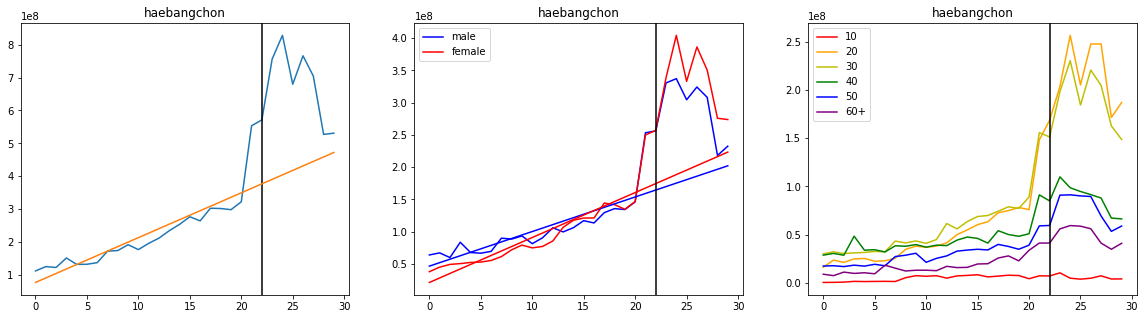

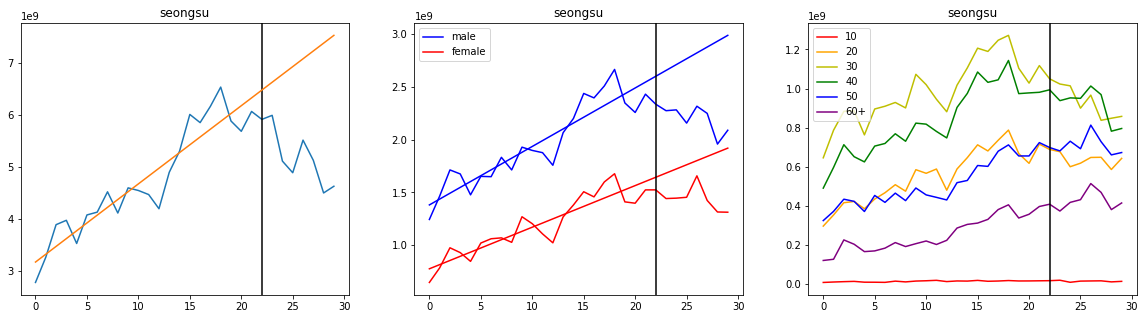

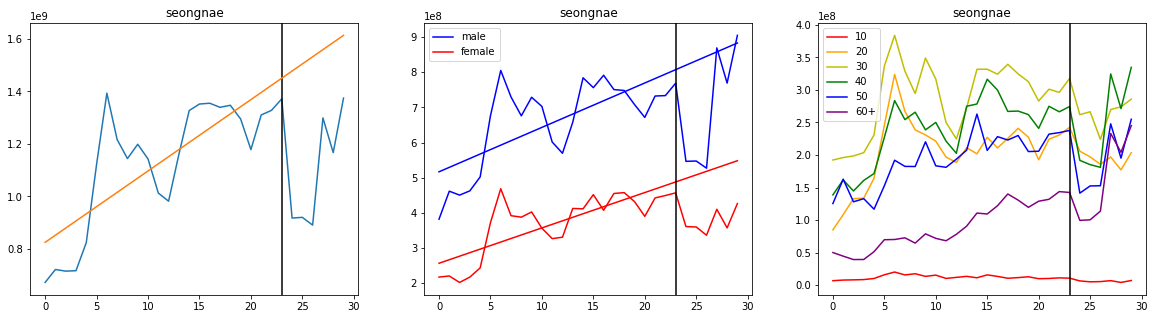

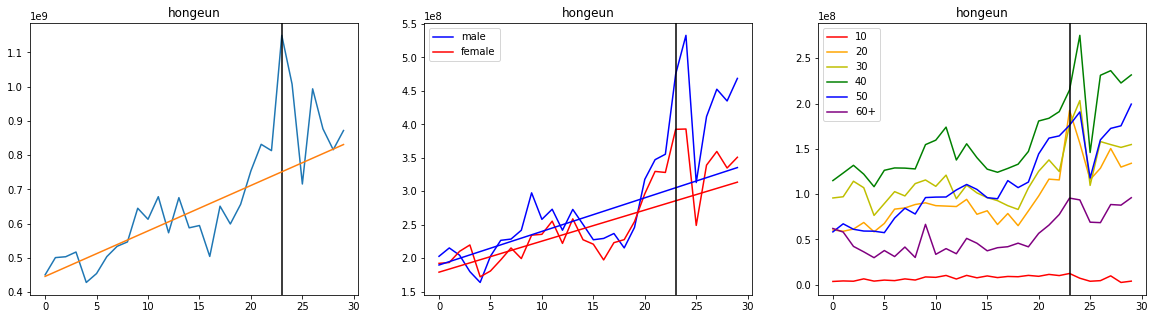

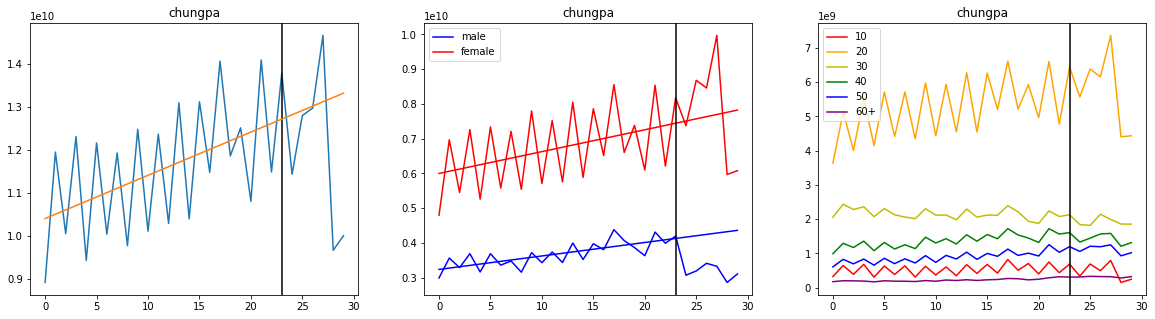

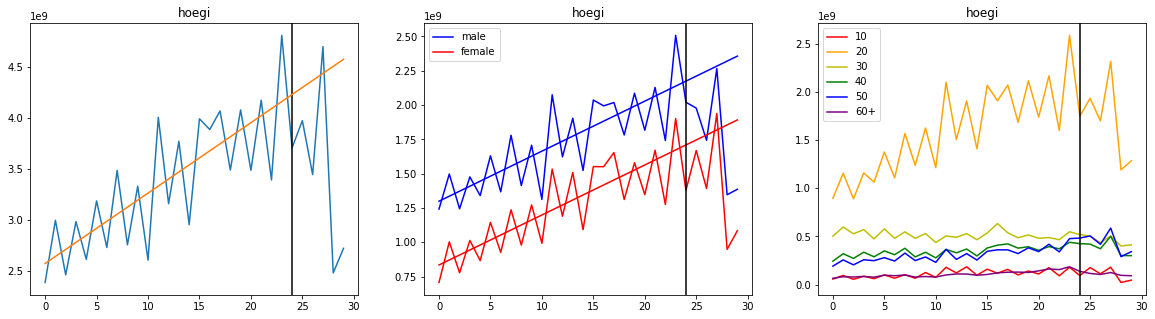

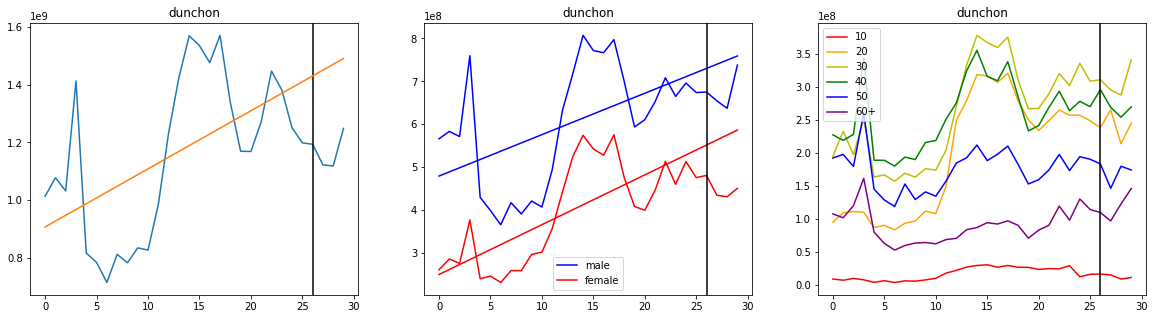

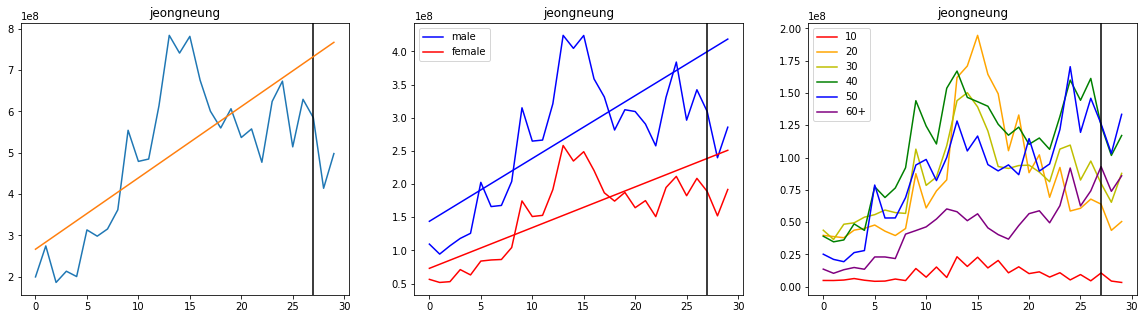

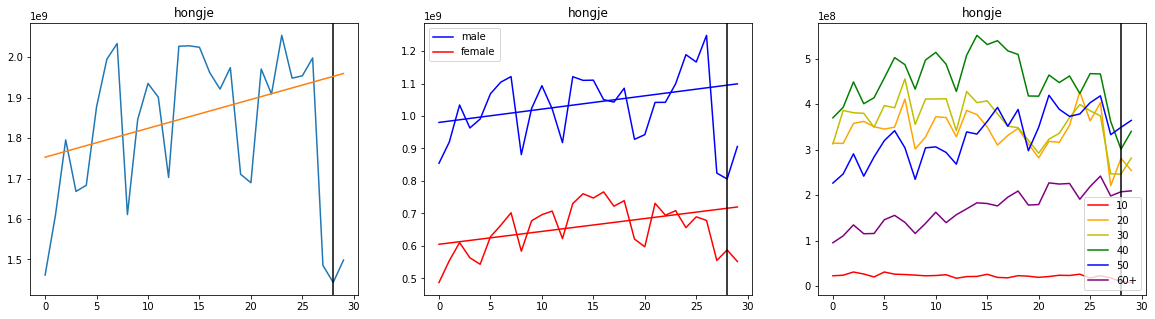

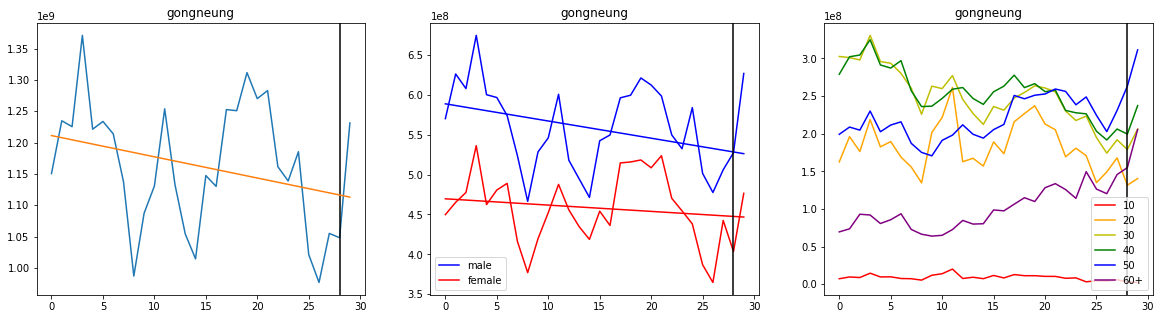

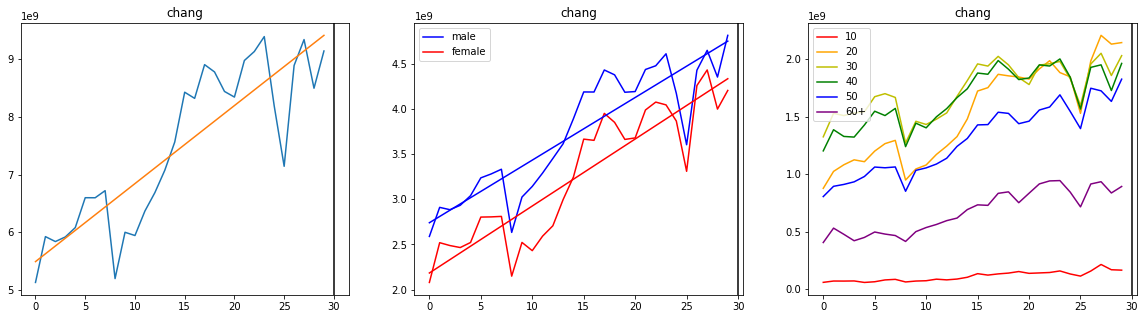

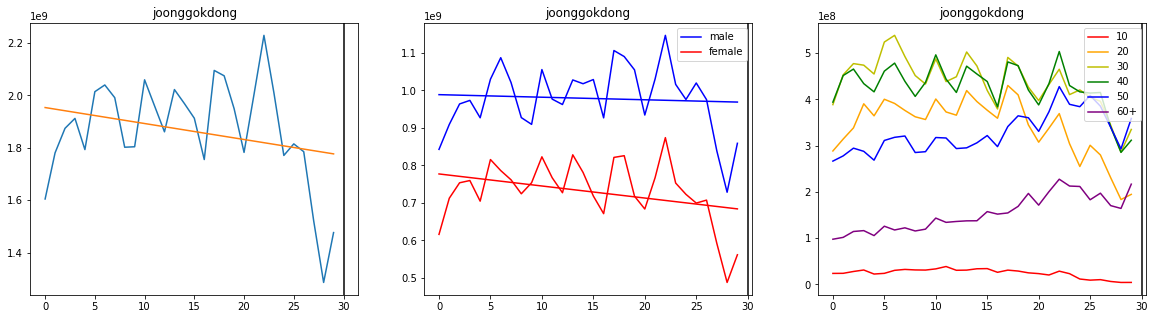

In [98]:
for i in range(12):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = s_data[s_data["area"]==i]
  axes[0].plot(temp.thsmon_selng_amt)
  axes[0].axvline(bd[i], color='k')
  axes[0].set_title(name[i])
  axes[0].plot(np.arange(30), y_predict[i])

  axes[1].plot(temp.ml_selng_amt, label="male", color='b')
  axes[1].plot(temp.fml_selng_amt, label="female", color='r')
  axes[1].plot(np.arange(30), y_predict_sex[2*i], color='b')
  axes[1].plot(np.arange(30), y_predict_sex[2*i+1],color='r')
  axes[1].axvline(bd[i], color='k')
  axes[1].set_title(name[i])
  axes[1].legend()

  axes[2].plot(temp.agrde_10_selng_amt, label="10", color='r')
  axes[2].plot(temp.agrde_20_selng_amt, label="20", color='orange')
  axes[2].plot(temp.agrde_30_selng_amt, label="30", color='y')
  axes[2].plot(temp.agrde_40_selng_amt, label="40", color='g')
  axes[2].plot(temp.agrde_50_selng_amt, label="50", color='b')
  axes[2].plot(temp.agrde_60_above_selng_amt, label="60+", color='purple')
  axes[2].axvline(bd[i], color='k')
  axes[2].set_title(name[i])
  axes[2].legend()



# 매출 건수

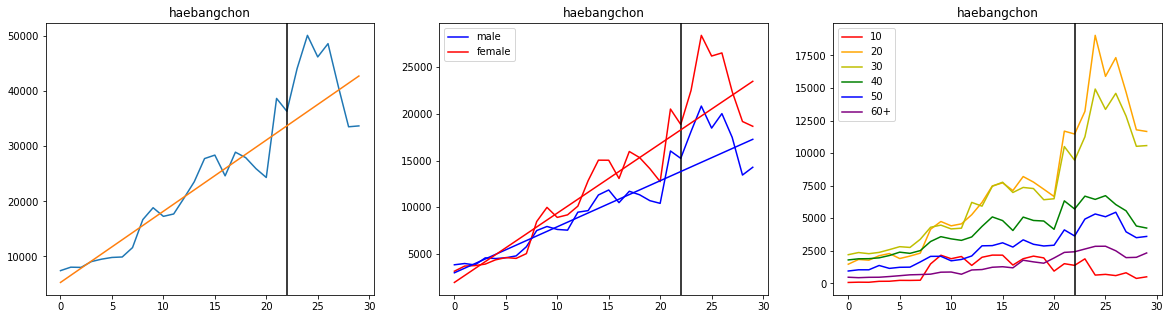

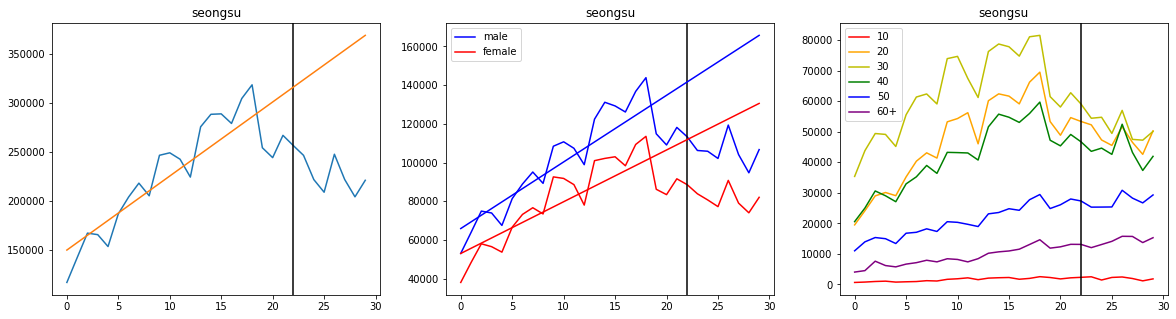

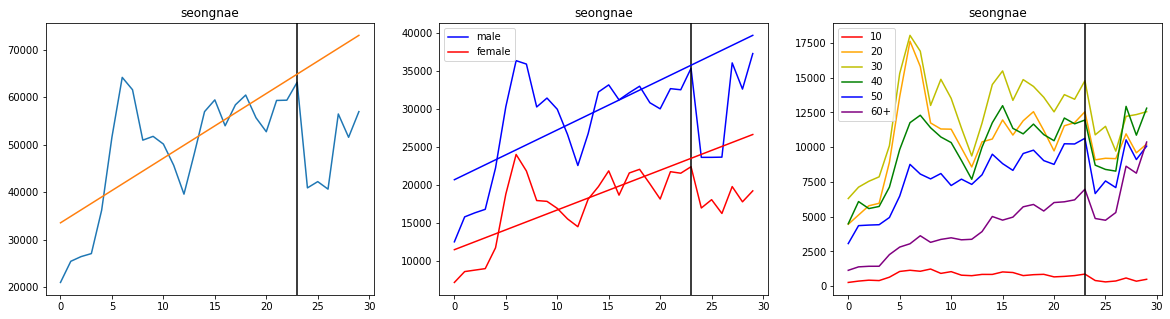

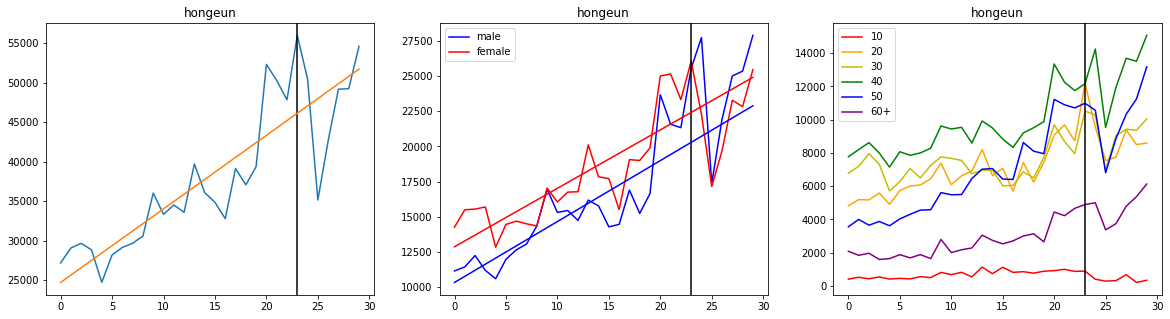

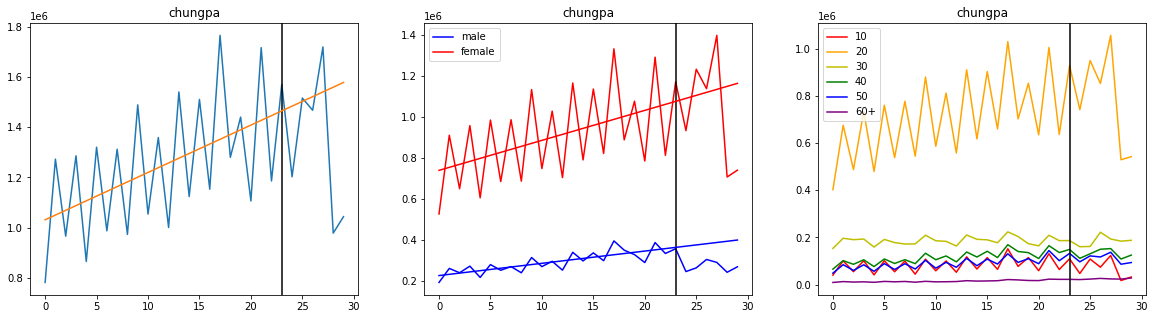

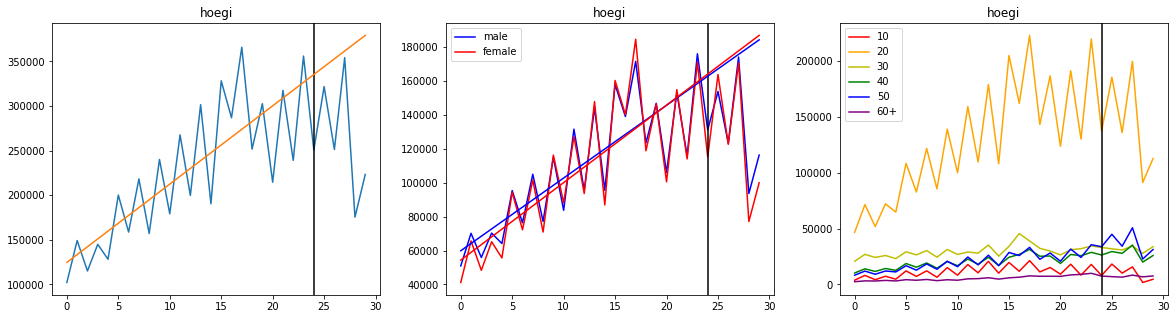

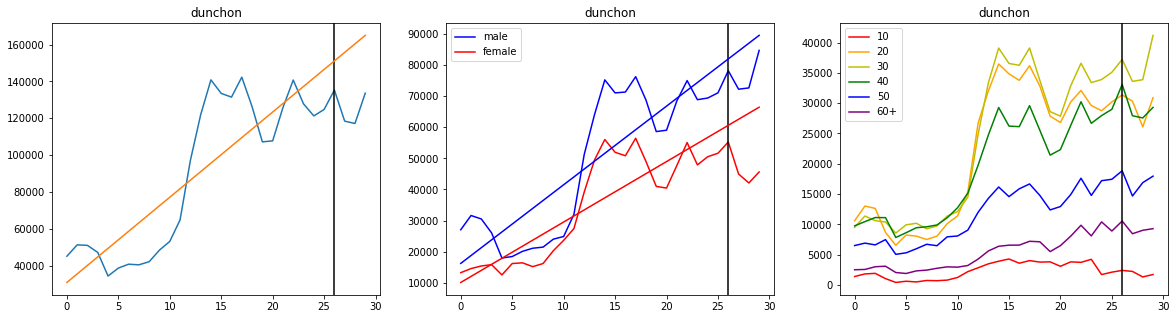

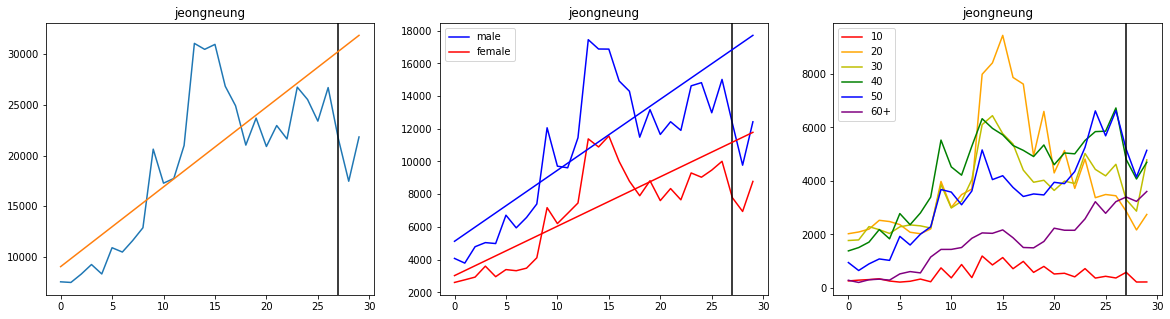

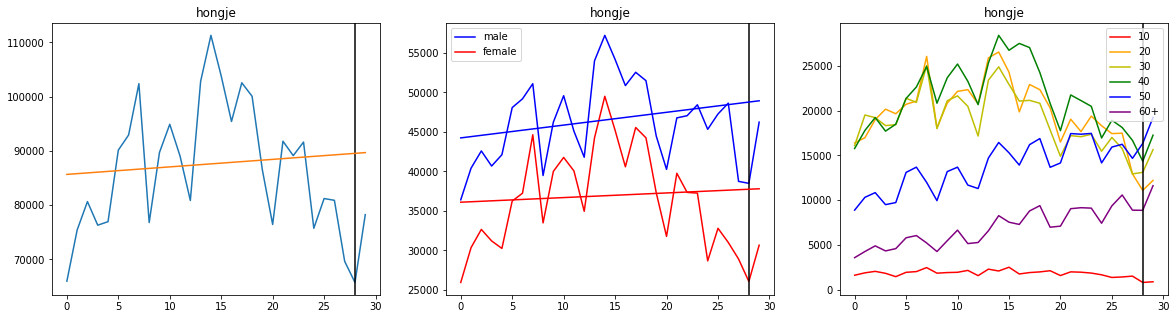

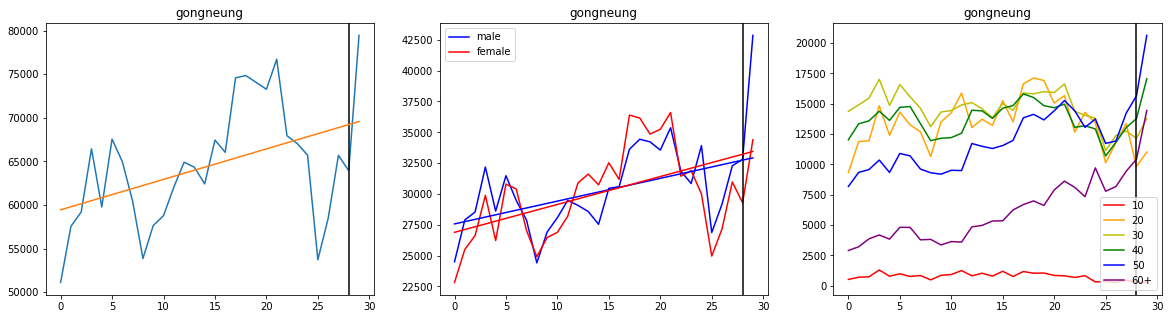

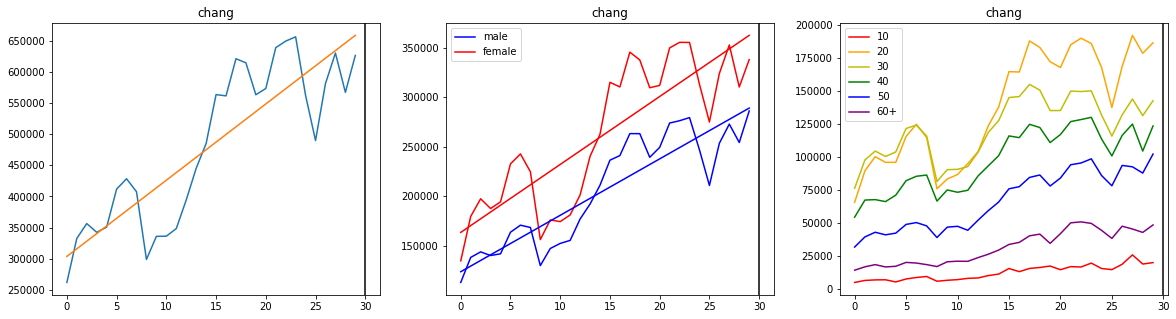

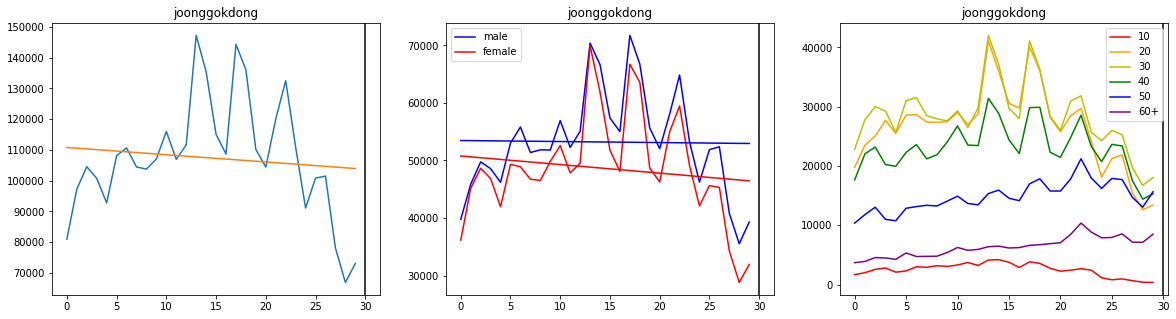

In [108]:
for i in range(12):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = s_data[s_data["area"]==i]
  axes[0].plot(temp.thsmon_selng_co)
  axes[0].axvline(bd[i], color='k')
  axes[0].set_title(name[i])
  axes[0].plot(np.arange(30), y_predict_co[i])

  
  axes[1].plot(temp.ml_selng_co, label="male", color='b')
  axes[1].plot(temp.fml_selng_co, label="female", color='r')
  axes[1].axvline(bd[i], color='k')
  axes[1].set_title(name[i])
  axes[1].legend()
  axes[1].plot(np.arange(30), y_predict_co_sex[2*i], color='b')
  axes[1].plot(np.arange(30), y_predict_co_sex[2*i+1], color='r')


  axes[2].plot(temp.agrde_10_selng_co, label="10", color='r')
  axes[2].plot(temp.agrde_20_selng_co, label="20", color='orange')
  axes[2].plot(temp.agrde_30_selng_co, label="30", color='y')
  axes[2].plot(temp.agrde_40_selng_co, label="40", color='g')
  axes[2].plot(temp.agrde_50_selng_co, label="50", color='b')
  axes[2].plot(temp.agrde_60_above_selng_co, label="60+", color='purple')
  axes[2].axvline(bd[i], color='k')
  axes[2].set_title(name[i])
  axes[2].legend()

# 유동인구

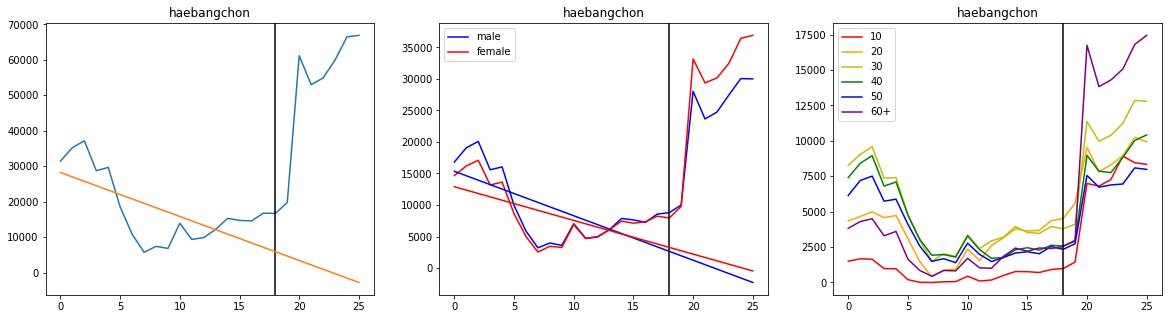

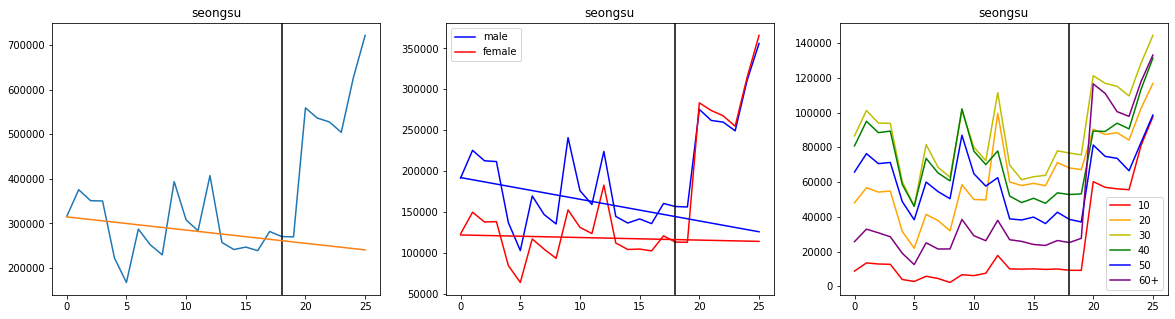

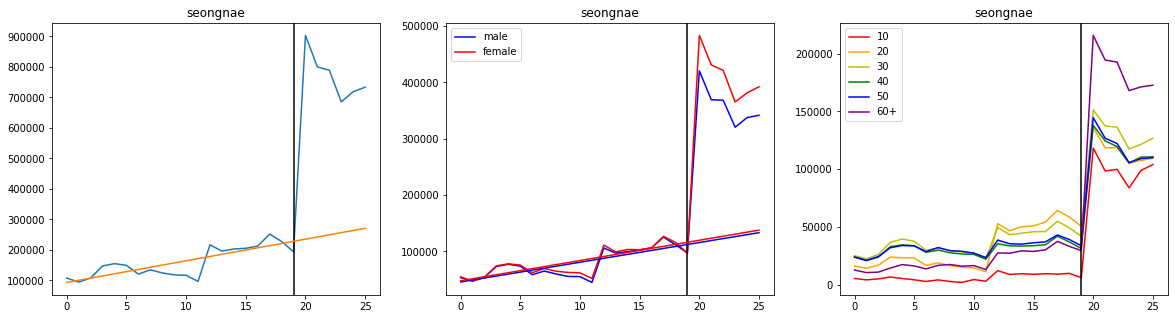

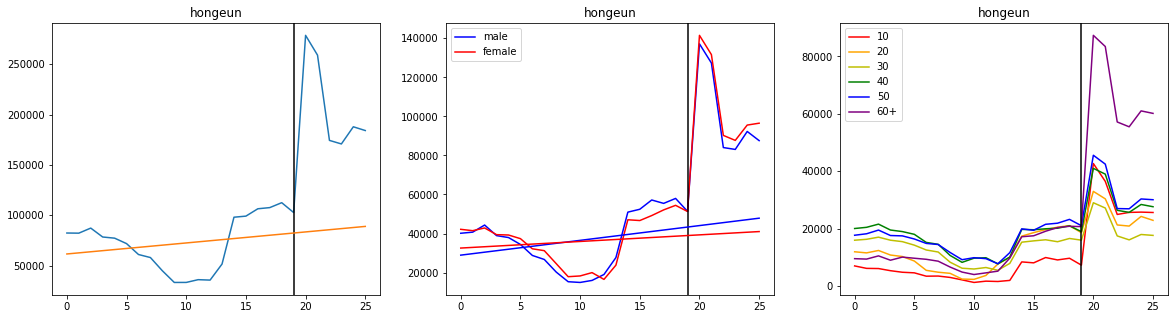

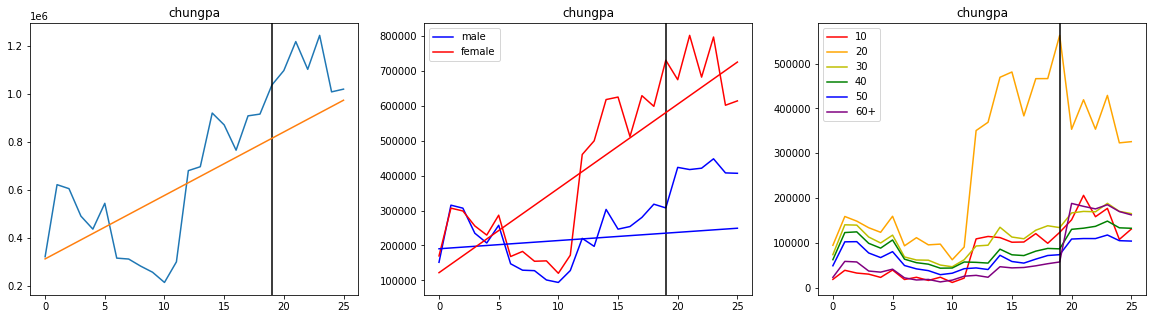

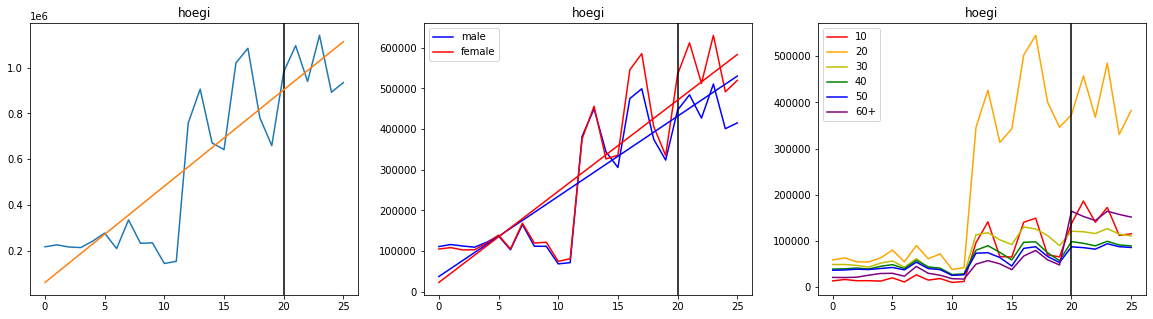

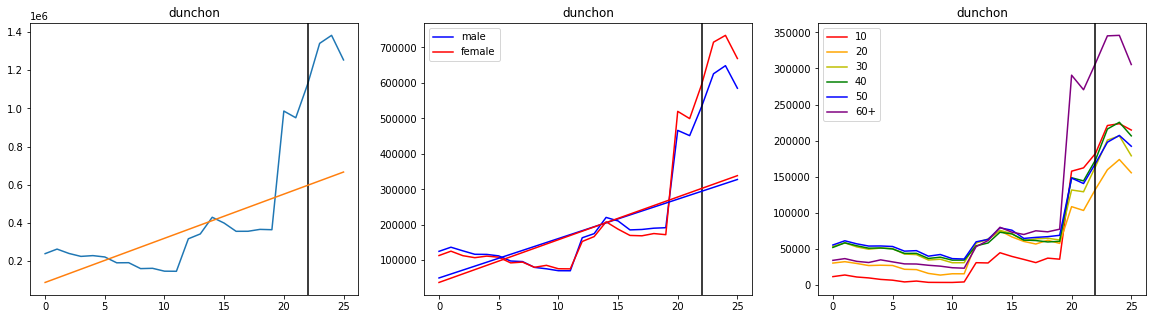

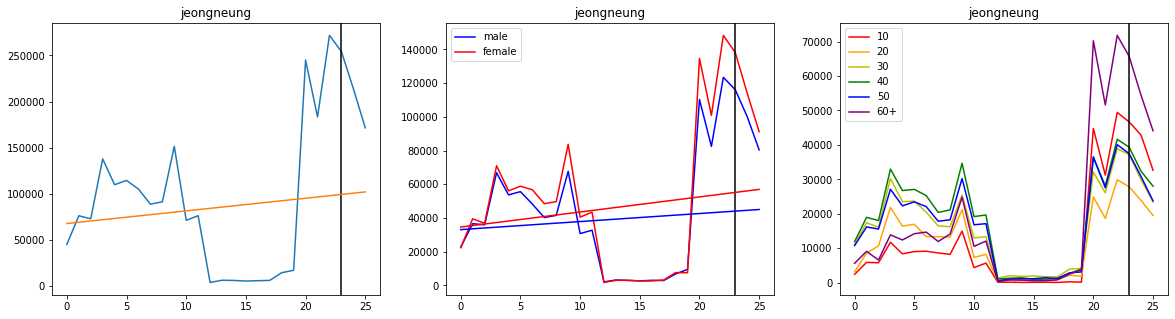

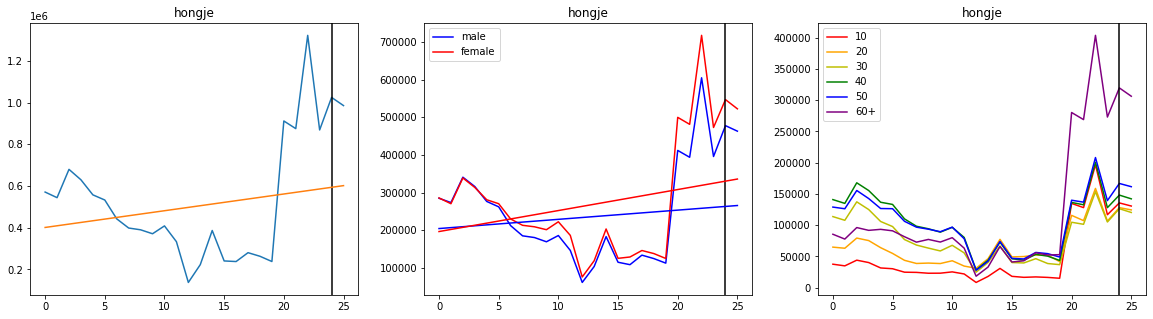

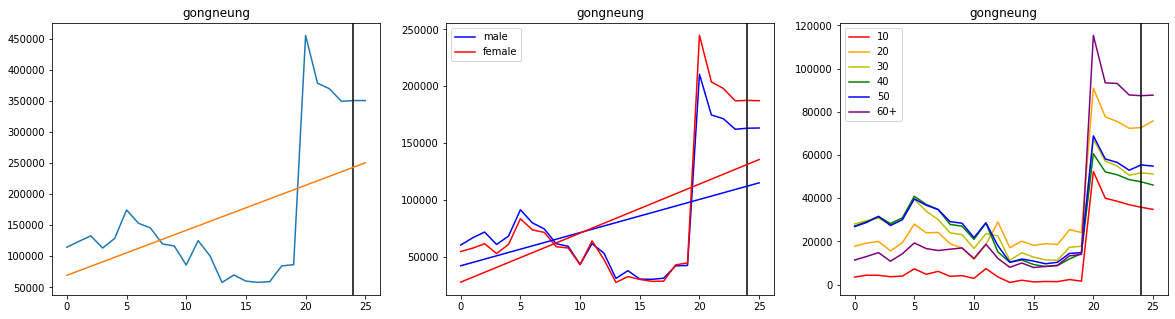

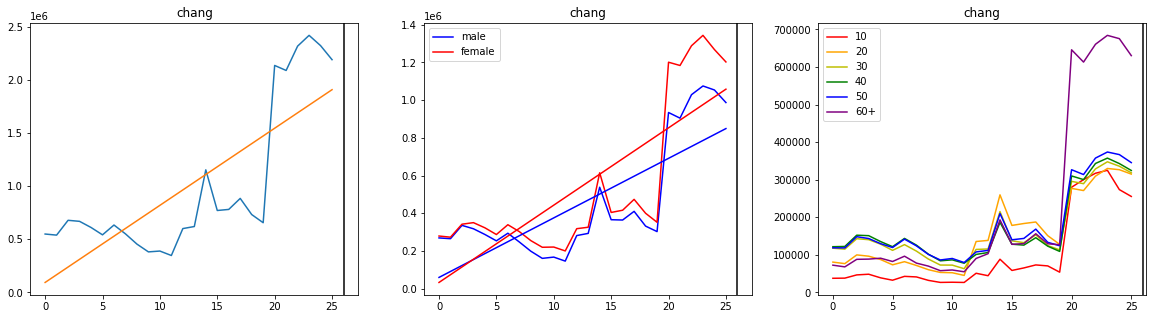

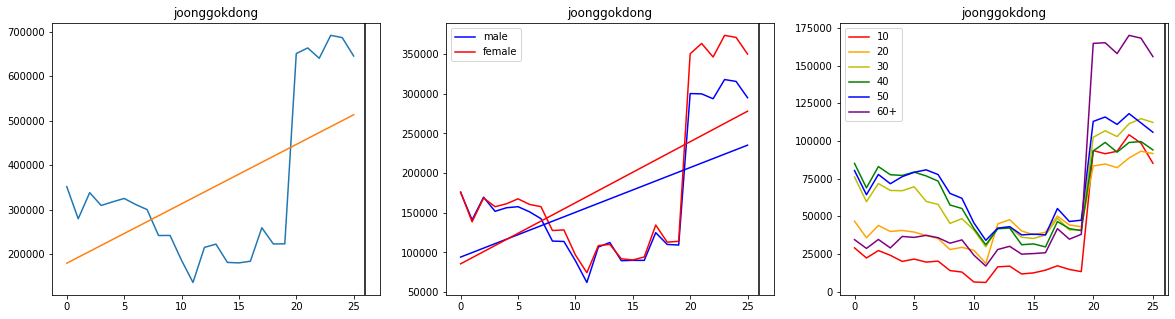

In [114]:
for i in range(12):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))
  temp = f_pop_data[f_pop_data["area"]==i]
  axes[0].plot(temp.총_유동인구_수)
  axes[0].axvline(bd[i]-4, color='k')
  axes[0].set_title(name[i])
  axes[0].plot(np.arange(26), y_predict_f_pop[i])
  
  axes[1].plot(temp.남성_유동인구_수, label="male", color='b')
  axes[1].plot(temp.여성_유동인구_수, label="female", color='r')
  axes[1].axvline(bd[i]-4, color='k')
  axes[1].set_title(name[i])
  axes[1].legend()
  axes[1].plot(np.arange(26), y_predict_f_pop_sex[2*i], color='b')
  axes[1].plot(np.arange(26), y_predict_f_pop_sex[2*i+1], color='r')
  
  axes[2].plot(temp.연령대_10_유동인구_수, label="10", color='r')
  axes[2].plot(temp.연령대_20_유동인구_수, label="20", color='orange')
  axes[2].plot(temp.연령대_30_유동인구_수, label="30", color='y')
  axes[2].plot(temp.연령대_40_유동인구_수, label="40", color='g')
  axes[2].plot(temp.연령대_50_유동인구_수, label="50", color='b')
  axes[2].plot(temp.연령대_60_이상_유동인구_수, label="60+", color='purple')
  axes[2].axvline(bd[i]-4, color='k')
  axes[2].set_title(name[i])
  axes[2].legend()